Visualizing Wishart distribution

cf. Kevin Murphy MLaPP Sec. 4.5.2

Since Wishart distribution is a distribution of "matrices", it's generally not easy to visualize the distribution. However, one can achieve it by drawing samples from the distribution and visualize each element of the sampled matrices. 

Moreover, the diagonal elements of the sampled matrices follow gamma distributions.

Below we visualize the Wishart distribution with two different strengths, $\nu$ =3 (weak) and $\nu$ =30 (strong), respectively.

In [1]:
import math
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sbn
from matplotlib.patches import Ellipse
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
def toCorr(S):
    Nrows, Ncols = S.shape
    R = np.zeros_like(S)
    for r in range(Nrows):
        for c in range(r,Ncols):
            R[r, c] = S[r, c]/np.sqrt(S[r, r] * S[c, c])
            R[c, r] = R[r, c]
    return R

In [2]:
S = np.array([[3.1653, -0.0262], [-0.0262, 0.6477]])
dof=3
wish = scipy.stats.wishart(scale=S, df=dof)

In [4]:
Nsample = 5000
var1_list = []
var2_list = []
corr12_list = []
for i in range(Nsample):
    sample = wish.rvs()
    R = toCorr(sample)
    var1_list.append(sample[0, 0])
    var2_list.append(sample[1, 1])
    corr12_list.append(R[0, 1])

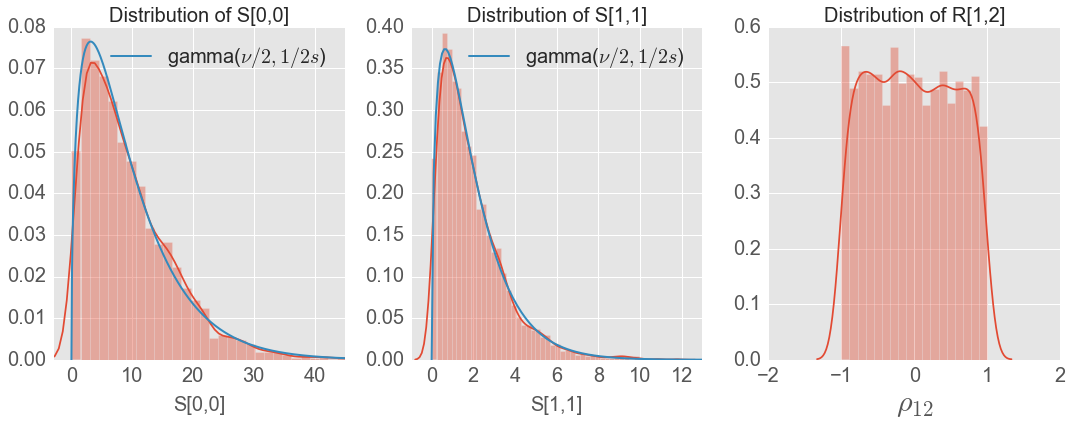

In [5]:
FONTSIZE = 20
plt.close('all')
fig = plt.figure(figsize=(15, 6))
gs = matplotlib.gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1]) 

# Plot the distribution of the first disgonal of S, which is a Gamma distribution
ax = plt.subplot(gs[0, 0])

gamma_dist = scipy.stats.gamma(a=dof/2.0, scale=2.0*S[0,0])
xs = np.linspace(0, 100, 1000)
ys = gamma_dist.pdf(xs)

kde_fit = sbn.distplot(var1_list, ax=ax, label='KDE')
analytical, = ax.plot(xs, ys, lw=2)
ax.legend([analytical], [r'gamma($\nu/2, 1/2s$)'], fontsize=FONTSIZE, loc='best')
ax.set_xlabel('S[0,0]', fontsize=FONTSIZE, labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0) 
ax.set_xlim(-3, 45)
t = ax.set_title('Distribution of S[0,0]', fontsize=FONTSIZE)


# Plot the distribution of the second disgonal of S, which is a Gamma distribution
ax = plt.subplot(gs[0, 1])

gamma_dist = scipy.stats.gamma(a=dof/2.0, scale=2.0*S[1,1])
xs = np.linspace(0, 100, 1000)
ys = gamma_dist.pdf(xs)

kde_fit = sbn.distplot(var2_list, ax=ax, label='KDE')
analytical, = ax.plot(xs, ys, lw=2)
ax.legend([analytical], [r'gamma($\nu/2, 1/2s$)'], fontsize=FONTSIZE, loc='best')
ax.set_xlabel('S[1,1]', fontsize=FONTSIZE, labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0) 
ax.set_xlim(-1, 13)
t = ax.set_title('Distribution of S[1,1]', fontsize=FONTSIZE)


# Plot the distribution of correlation term, S[1,2]
ax = plt.subplot(gs[0, 2])
kde_fit = sbn.distplot(corr12_list, ax=ax, label='KDE')
t = ax.set_title('Distribution of R[1,2]', fontsize=FONTSIZE)
ax.set_xlabel(r'$\rho_{12}$', fontsize=FONTSIZE*1.5, labelpad=5)
ax.xaxis.set_ticks(np.arange(-2, 2.1, 1))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0) 
ax.set_xlim(-2, 2)

plt.tight_layout(w_pad=2, h_pad=1)

In [6]:
S = np.array([[3.1653, -0.0262], [-0.0262, 0.6477]])
dof=30
wish = scipy.stats.wishart(scale=S, df=dof)

Nsample = 5000
var1_list = []
var2_list = []
corr12_list = []
for i in range(Nsample):
    sample = wish.rvs()
    R = toCorr(sample)
    var1_list.append(sample[0, 0])
    var2_list.append(sample[1, 1])
    corr12_list.append(R[0, 1])

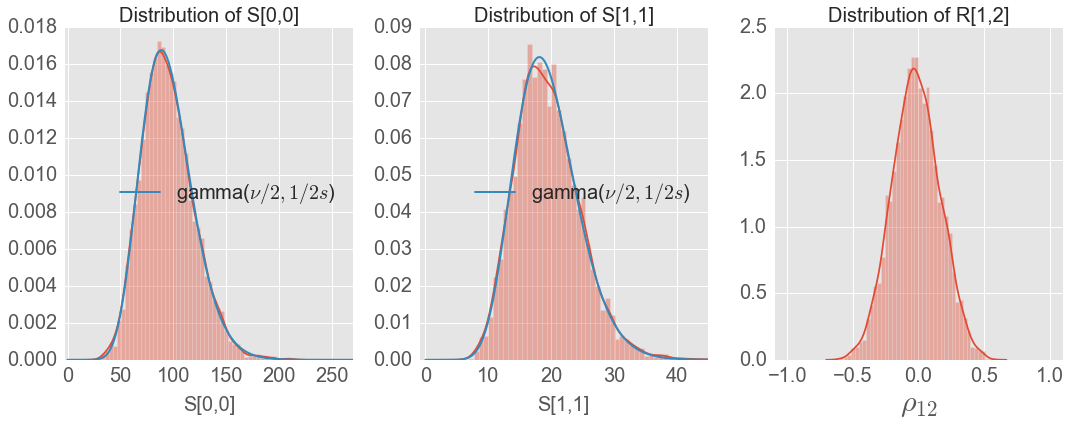

In [12]:
FONTSIZE = 20
plt.close('all')
fig = plt.figure(figsize=(15, 6))
gs = matplotlib.gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1]) 

# Plot the distribution of the first disgonal of S, which is a Gamma distribution
ax = plt.subplot(gs[0, 0])

gamma_dist = scipy.stats.gamma(a=dof/2.0, scale=2.0*S[0,0])
xs = np.linspace(0, 300, 1000)
ys = gamma_dist.pdf(xs)

kde_fit = sbn.distplot(var1_list, ax=ax, label='KDE')
analytical, = ax.plot(xs, ys, lw=2)
ax.legend([analytical], [r'gamma($\nu/2, 1/2s$)'], fontsize=FONTSIZE, loc='best')
ax.set_xlabel('S[0,0]', fontsize=FONTSIZE, labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0) 
ax.set_xlim(-3, 270)
t = ax.set_title('Distribution of S[0,0]', fontsize=FONTSIZE)


# Plot the distribution of the second disgonal of S, which is a Gamma distribution
ax = plt.subplot(gs[0, 1])

gamma_dist = scipy.stats.gamma(a=dof/2.0, scale=2.0*S[1,1])
xs = np.linspace(0, 80, 1000)
ys = gamma_dist.pdf(xs)

kde_fit = sbn.distplot(var2_list, ax=ax, label='KDE')
analytical, = ax.plot(xs, ys, lw=2)
ax.legend([analytical], [r'gamma($\nu/2, 1/2s$)'], fontsize=FONTSIZE, loc='best')
ax.set_xlabel('S[1,1]', fontsize=FONTSIZE, labelpad=10)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0) 
ax.set_xlim(-1, 45)
t = ax.set_title('Distribution of S[1,1]', fontsize=FONTSIZE)


# Plot the distribution of correlation term, S[1,2]
ax = plt.subplot(gs[0, 2])
kde_fit = sbn.distplot(corr12_list, ax=ax, label='KDE')
t = ax.set_title('Distribution of R[1,2]', fontsize=FONTSIZE)
ax.set_xlabel(r'$\rho_{12}$', fontsize=FONTSIZE*1.5, labelpad=5)
ax.xaxis.set_ticks(np.arange(-1, 1.1, 0.5))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0) 
ax.set_xlim(-1.1, 1.1)

plt.tight_layout(w_pad=2, h_pad=1)